# Teleportación cuántica

Si te has leído todos los capítulos anteriores para llegar hasta aquí, tengo dos buenas noticias y una mala. Las buenas son:

- la teleportación cuántica sí existe. No es nada esotérico, ni ciencia ficción sino algo totalmente científico, descrito matemáticamente y comprobado experimentalmente.
- vas a entender cómo funciona... Bueno, si no has estudiado mecánica cuántica te tienes que creer alguna cosa aunque no la entiendas.

La mala noticia es que no funciona como nos lo cuentan en las películas o libros de ciencia ficción. No nos va a servir para meternos en un aparato y salir por otro a muchos kilómetros de distancia.

En los capítulos anteriores, hemos visto que un qubit puede estar en ***superposición*** de dos estados fundamentales y lo escribíamos así:   $\alpha \ket{0} + \beta \ket{1} $.  Un ejemplo de ello era el estado que salía de aplicar una puerta Hadamard al estado $\ket 0$, si recuerdas: $\frac{1}{\sqrt 2} \ket{0} + \frac{1}{\sqrt 2} \ket{1} $. Algunos utilizan esto, pura matemática, para afirmar que *"la mecánica cuántica dice que un objeto puede estar en varios sitios a la vez"* cosa que no es así. La mecánica cuántica tiene sentido, se aplica y funciona bien para las cosas muy pequeñas pero para las cosas grandes, como una manzana, nadie ha podido verificar experimentalmente que pueda estar a la vez en el árbol o en mi casa y, matemáticamente, no creo que lo haya intentado alguien. Con esto te destruyo el mito de la bilocación por medio de la superposición cuántica, lo siento...

El segundo mito que voy a destruir es el transporte de objetos por medio de la teleportación cuántica. Las matématicas nos dicen que debemos entender la teleportación cuántica como la transferencia del estado de un qubit hacia otro. La forma que vamos a ver para transferir un estado cuántico necesita no solo el qubit original y el qubit de destino sino además la ayuda de un qubit adicional y de un pequeño canal clásico que transmita un dos bits por medios convencionales y a esto lo llamaremos el algoritmo de teleportación cuántica. Si alguien está pensando en que podríamos repetir este algoritmo para todas las particulas subatómicas de una manzana y replicarlas en otro sitio, tengo una mala noticia: aparte de la ayuda adicional de otro qubit y de los dos bits clásicos, la información del origen se destruye, como vamos a ver a continuación. Desafortunadamente, mediante este método no podremos transportar personas ni crear dos manzanas exactamente iguales. Si quieres comer muchas manzanas, yo plantaría un árbol.

## El algoritmo de teleportación

En la literatura de computación cuántica, siempre se suele explicar el algoritmo por medio de una historia de dos personajes: Alice y Bob que se primero se juntan, luego se separan y al final se transmiten un mensaje (el estado de un qubit) a pesar la gran distancia entre ellos. Yo te lo voy a explicar sin juegos de roles y seguro que a estas alturas ya me crees si te digo que no será por falta de imaginación. Además, hay montones de recursos que lo explican así, de modo que no sería más que una repetición innecesaria. 

Yo te voy a explicar el algoritmo por medio de las mátemáticas y la programación con el único fin de que descubras por ti mismo si eres capaz de seguirme de esta forma. Si tienes dificultades o no te gusta, te puedo asegurar que mucho menos te van a gustar otros algoritmos que vas a necesitar aprender si te dedicas a la computación cuántica algún día. Es decir: te voy a ayudar un poco a decidir si la computación cuántica es algo para ti o no.

Vamos a empezar con tres qubits, uno que lo llamaremos $q_0$ y que está indeterminado, no sabemos en qué estado está. Los otro podemos elegir su estado a voluntady los inicializamos a $\ket{0}$. Por eso vamos a decir: 

$$
\ket{q_0} = \alpha \ket{0} + \beta \ket{1} 
$$

$$
\ket{q_1} = \ket{0} 
$$

$$
\ket{q_2} = \ket{0} 
$$

 y lo vamos a pintar:


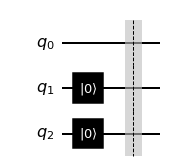

In [11]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)

circuit.reset(1)
circuit.reset(2)

circuit.barrier()

circuit.draw()

Si nuestro objetivo es transferir el estado de $q_0$ a otro qubit, te preguntarás por qué necesitamos dos qubits más y por qué los inicializamos a $\ket 0 $. La respuesta rápida es que mecánica cuántica prohíbe la copia de estados cuánticos y, si bien las transferencias de estados son posibles mediante algunas artimañas, en ningún caso salen gratis. En nuestro caso esto significa que vamos a pagar el precio de sacrificar al pobre $q_0$ para que nos de su información y también a un desgraciado voluntario $q_1$ que va a servir como mensajero o ayudante de mensajería para que $q_2$ se quede con la información de $q_0$. Esto parece más bien una tiranía, pero ya sabes que las matemáticas carecen de moral, sentimiento o conciencia. Lo de incializar a $\ket 0 $ es arbitrario, lo que importa es que sea conocido, así que elegimos lo más fácil. Como ya te digo $q_1$ y $q_2$ no se van a quejar.

Vamos a ver cómo expresaríamos matemáticamente lo que hay en la barrera (la línea gris vertical que ponemos solo para señalar una posición, no tiene ningún efecto). Para eso, recordamos lo que vimos en un capítulo anterior en el que decíamos que el estado combinado era un producto tensorial de los estados individuales:

$$
\ket{q_0} \otimes \ket{q_1} \otimes \ket{q_2}
$$

Sustituyendo lo que sabemos sería:

$$
(\alpha \ket{0} + \beta \ket{1}) \otimes \ket{0} \otimes \ket{0}
$$

Esto podríamos desarrollarlo más pero, de momento, no nos interesa. Lo dejamos aquí y seguimos.


Lo primero que vamos a hacer es entrelazar a $q_1$ y a $q_2$. Es como preparar al equipo que va a recibir la transmisión de información. Te adelanto que el receptor será $q_2$ y $q_1$ va a ser el asistente, el fiel escudero que se sacrifica por su señor:

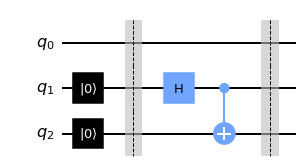

In [12]:
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

circuit.draw()

Esto lo hemos visto justo en el capítulo anterior. Se trata de una puerta Hadamard en $q_1$ y otra $CNOT$ entre $q_1$ y $q_2$. Además, ya sabemos lo que sale en la segunda barrera para $q_1$ y $q_2$:

$$
\frac{1}{\sqrt 2} \ket{00} + \frac{1}{\sqrt 2} \ket{11}
$$

Pero no olvidemos que $q_1$ y $q_2$ están unidos con $q_0$ (que se pone delante de ellos) así que tendremos que realizar el producto tensorial para juntar a los tres:

$$
(\alpha \ket{0} + \beta \ket{1}) \otimes (\frac{1}{\sqrt 2} \ket{00} + \frac{1}{\sqrt 2} \ket{11})
$$

Ahora sí que nos va a interesar desarrollar esto, aplicando las reglas del álgebra lineal, que nos permiten utilizar la propiedad distributiva y sacar el $\frac{1}{\sqrt 2}$ al frente, para que no nos moleste:


$$
\frac{1}{\sqrt 2} 
(
  \alpha \ket{0} \otimes \ket{00} + 
  \alpha \ket{0} \otimes \ket{11} + 
  \beta \ket{1} \otimes \ket{00} + 
  \beta \ket{1} \otimes \ket{11}
)
$$

Ya vimos que los productos tensoriales, si están así de juntos se pueden escribir abreviadamente y así queda la cosa más limpia:

$$
\frac{1}{\sqrt 2} 
(
  \alpha \ket{000} + 
  \alpha \ket{011} + 
  \beta  \ket{100} + 
  \beta  \ket{111}
)
$$

Bueno, esto de momento, no nos dice mucho. Hemos de avanzar un poco más. Agárrate que ahora viene un acto de fe.

Hemos vinculado los destinos de $q_1$ y $q_2$ mediante el entrelazamiento que explicamos en el capítulo anterior. No es descabellado pensar que quizá deberíamos hacer algo parecido con $q_0$ para que su incertidumbre (es decir, su información) se transfiriera a los demás. Bueno, pues a alguien que sabía bastante de álgebra, de espacios vectoriales, de cambios de base y no sé qué más se le ocurrió algo que hacer con $q_0$:

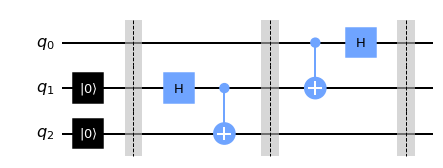

In [13]:
circuit.cx(0,1)
circuit.h(0)

circuit.barrier()

circuit.draw()

Si te fijas, añadimos a $q_0$ y a $q_1$ las mismas puertas que hay en $q_1$ y $q_2$ pero colocadas al revés: primero una $CNOT$ entre $q_0$ y $q_1$ y después una Hadamard en $q_0$. Esto no es nada casual y tiene que ver con los conceptos que acabo de mencionar pero no te lo puedo explicar en pocas palabras. Créeme si te digo que la función de este segundo bloque pasar la información de $q_0$ al escudero del equipo de recepción $q_1$. Para que sea más sencillo seguir el razonamiento, vamos primero a ver qué sale de la $CNOT$ y luego veremos qué pasa con la Hadamard.

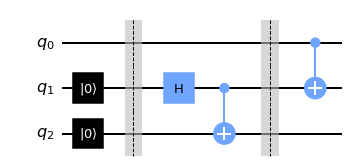

In [2]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)

circuit.reset(1)
circuit.reset(2)

circuit.barrier()
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)

circuit.draw()

En la segunda barrera teníamos: 

$$
\frac{1}{\sqrt 2} 
(
  \alpha \ket{000} + 
  \alpha \ket{011} + 
  \beta  \ket{100} + 
  \beta  \ket{111}
)
$$

Pensemos un momento en el interior de los kets. Cuando vemos $\ket{000}$ cada $0$ viene de un qubit distinto, no debemos olvidarlo. Para verlo más claro, podríamos poner colores. Por ejemplo si $\color{red}q_0$ es rojo, $\color{blue}q_1$ es azul y $\color{green}q_2$ es verde,  podríamos escribir: $\ket{\color{red}0\color{blue}0\color{green}0}$ y así, no solo por el orden de escritura, sino también por el color, sabemos a qué qubit nos referimos. La expresión de arriba quedaría así:

$$
\frac{1}{\sqrt 2} 
(
  \alpha \ket{\color{red}0\color{blue}0\color{green}0} + 
  \alpha \ket{\color{red}0\color{blue}1\color{green}1} + 
  \beta  \ket{\color{red}1\color{blue}0\color{green}0} + 
  \beta  \ket{\color{red}1\color{blue}1\color{green}1}
)
$$

 Esto me sirve para explicar lo que va a hacer la puerta $CNOT$ del final del circuito anterior. Recordemos que una puerta $CNOT$ deja el primer qubit como está y el segundo cambia si el primero vale 1. Entonces, la expresión de arriba va a quedar como está para $q_0$ y $q_2$ y si algo cambia será $q_1$ cuando $q_0$ valga 1. Es decir, los números rojos y verdes no van a cambiar y los azules sí, pero solo si tienen delante un $\color{red}1$ rojo. Así pues, voy a aplicar esto a la expresión de arriba, fijándome en los colores, dejando como estaba casi todo y destacando solo aquellos que cambian:


$$
\frac{1}{\sqrt 2} 
(
  \alpha \ket{000} + 
  \alpha \ket{011} + 
  \beta  \ket{1 {\color{blue}1} 0} + 
  \beta  \ket{1 {\color{blue}0} 1}
)
$$


Esto ha sido fácil. Ahora viene algo más complicado, pues llega la puerta Hadamard en el $q_0$.



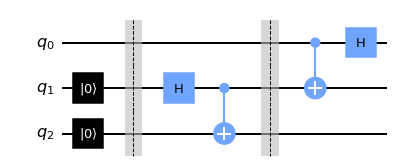

In [3]:
circuit.h(0)

circuit.draw()



 Vamos a destacar el ${\color{red}q_0}$ en la expresión de arriba, pues es lo que va a cambiar:

$$
\frac{1}{\sqrt 2} 
(
  \alpha \ket{{\color{red}0} 00} + 
  \alpha \ket{{\color{red}0} 11} + 
  \beta  \ket{{\color{red}1} 10} + 
  \beta  \ket{{\color{red}1} 01}
)
$$

Aplicando el mismo razonamiento, cada vez que veamos un ${\color{red}0}$ rojo hemos de cambiarlo por:

$$
H \ket{0} = {\color{red}\frac{1}{\sqrt 2} \ket{0} + \frac{1}{\sqrt 2} \ket{1} }
$$

y si vemos un ${\color{red}1}$ rojo, hemos de cambiarlo por:

$$
H \ket{1} = {\color{red}\frac{1}{\sqrt 2} \ket{0} - \frac{1}{\sqrt 2} \ket{1} }
$$


Además de sustituir las piezas rojas, voy a aprovechar para aplicar otra vez las reglas del álgebra lineal (como casi siempre, la propiedad distributiva) y dejar una expresión más bonita. Observa como los números rojos correspondientes a $q_0$ se desdoblan en dos (dado que la puerta Hadamard tiene dos términos) y que, además, esta introduce otro $\frac{1}{\sqrt 2}$ que podemos sacar y multiplicar con el otro que había, quedando simplemente $\frac{1}{2}$ sin la raíz:


$$
\begin{aligned}
\frac{1}{2} ( &\newline
  &\alpha \ket{{\color{red}0} 00} + \newline
  &\alpha \ket{{\color{red}1} 00} + \newline \newline

  &\alpha \ket{{\color{red}0} 11} + \newline
  &\alpha \ket{{\color{red}1} 11} + \newline \newline
  
  &\beta  \ket{{\color{red}0} 10} - \newline
  &\beta  \ket{{\color{red}1} 10} + \newline  \newline

  &\beta  \ket{{\color{red}0} 01} -\newline
  &\beta  \ket{{\color{red}1} 01} \newline 
)&
\end{aligned}
$$





Ahora vamos a escribir exactamente lo mismo, pero fijándonos en el qubit $\color{green}q_2$, que lo destacamos en verde:


$$
\begin{aligned}
\frac{1}{2} ( &\newline
  &\alpha \ket{0 0 \color{green}0} + \newline
  &\alpha \ket{1 0\color{green}0} + \newline \newline

  &\alpha \ket{0 1\color{green}1} + \newline
  &\alpha \ket{1 1\color{green}1} + \newline \newline
  
  &\beta  \ket{0 1\color{green}0} - \newline
  &\beta  \ket{1 1\color{green}0} + \newline  \newline

  &\beta  \ket{0 0\color{green}1} -\newline
  &\beta  \ket{1 0\color{green}1} \newline 
)&
\end{aligned}
$$







Si normalmente nos gusta abreviar las expresiones matemáticas, en esta ocasión las vamos a "desabreviar". Prometo que esta va a ser la expresión más larga que vamos a escribir, luego la cosa mejora. Lo que vamos a hacer es a "sacar" el qubit $\color{green}q_2$ hacia la derecha junto con la $\alpha$ o la $\beta$ que haya en su término. Por ejemplo: $\alpha \ket{0 0 \color{green}0} = \ket{0 0} \otimes \alpha \ket{\color{green}0} $. Me tomaré la licencia de no escribir el símbolo $\otimes$:


$$
\begin{aligned}
\frac{1}{2} ( &\newline
  & \ket{00} \alpha \ket{\color{green}0} + \newline
  & \ket{10} \alpha \ket{\color{green}0} + \newline \newline

  & \ket{01} \alpha \ket{\color{green}1} + \newline
  & \ket{11} \alpha \ket{\color{green}1} + \newline \newline
  
  & \ket{01} \beta \ket{\color{green}0} - \newline
  & \ket{11} \beta \ket{\color{green}0} + \newline  \newline

  & \ket{00} \beta \ket{\color{green}1} - \newline
  & \ket{10} \beta \ket{\color{green}1} \newline 
)&
\end{aligned}
$$


A continuación, vamos a reescribir de nuevo esta expresión, tratando de reducir esas ocho líneas y dejarlas en cuatro. Para ello, vamos a intentar agruparlo todo en función de los cuatro estados fundamentales que se obtienen de juntar dos qubits $q_0$ y $q_1$, es decir: $\ket{00},\ket{01},\ket{10},\ket{11}$ que es lo que aparece al principio de cada línea.

 Fíjate en que lo que estamos haciendo desde que pusimos la última puerta Hadamard es tratar de separar $q_2$ del resto y tratar de hacer algo con $q_0$ y $q_1$ que fuerce una transferencia del estado de $q_0$. La expresión matemática que nos quede es lo que nos va a dar la pista de lo que debemos hacer para conseguir este objetivo.

Pero no nos adelantemos y vamos a reescribir la expresión de arriba como hemos dicho utilizando otra vez el código de colores $\ket{\color{red}0\color{blue}0\color{green}0}$. Es decir: $\color{red}q_0$ es rojo, $\color{blue}q_1$ es azul y $\color{green}q_2$ es verde.

$$
\begin{aligned}
\frac{1}{2}  \ket{\color{red}0\color{blue}0} & \enspace (\enspace \alpha \ket{\color{green}0} + \beta \ket{\color{green}1}  \enspace ) +  \newline  \newline
\frac{1}{2}  \ket{\color{red}0\color{blue}1} & \enspace (\enspace \beta \ket{\color{green}0} + \alpha \ket{\color{green}1}  \enspace) +  \newline  \newline
\frac{1}{2}  \ket{\color{red}1\color{blue}0} & \enspace (\enspace \alpha \ket{\color{green}0} - \beta \ket{\color{green}1}  \enspace) +  \newline  \newline
\frac{1}{2}  \ket{\color{red}1\color{blue}1} & \enspace (\enspace -\beta \ket{\color{green}0} + \alpha \ket{\color{green}1} \enspace)  \newline  \newline
\end{aligned}
$$


La expresión de arriba es, sin duda la idea esencial del algoritmo. Si recuerdas, al principio de todo, describíamos nuestro qubit desconocido $q_0$ por medio de una alfa y una beta, así:  $\ket{q_0} = \alpha \ket{0} + \beta \ket{1}$. Piénsalo un poco y estarás conmigo en que esa alfa y esa beta son realmente lo que caracteriza a $q_0$, es decir: cualquier qubit que tenga esa misma alfa y esa beta, será exactamente igual a $q_0$. Dicho de otra manera: los coeficientes $\alpha$ y $\beta$ son los portadores de la información del estado en que se encuentra $q_0$. Pero ahora fíjate bien en la expresión de arriba y observa dónde han ido a parar la $\alpha$ y la $\beta$: ahora están al lado de los números verdes, que son los que representan a $q_2$. Se han desvinculado totalmente de $q_0$, como si los portadores de información se hubieran transferido a $q_2$. Eso suena exactamente como lo que queríamos.

Hagamos aquí una parada intermedia para recopilar. Partíamos de esta situación:

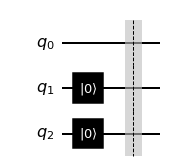

In [1]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)

circuit.reset(1)
circuit.reset(2)

circuit.barrier()

circuit.draw()

Después hemos añadido unas cuantas puertas lógicas:

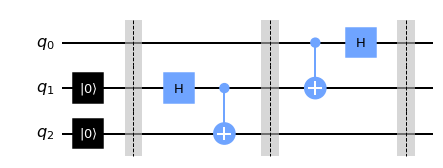

In [2]:
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.barrier()

circuit.draw()

Y las matemáticas nos dicen que a la derecha de la última barrera tenemos el estado combinado:

$$
\begin{aligned}
\frac{1}{2}  \ket{\color{red}0\color{blue}0} & \enspace (\enspace \alpha \ket{\color{green}0} + \beta \ket{\color{green}1}  \enspace ) +  \newline  \newline
\frac{1}{2}  \ket{\color{red}0\color{blue}1} & \enspace (\enspace \beta \ket{\color{green}0} + \alpha \ket{\color{green}1}  \enspace) +  \newline  \newline
\frac{1}{2}  \ket{\color{red}1\color{blue}0} & \enspace (\enspace \alpha \ket{\color{green}0} - \beta \ket{\color{green}1}  \enspace) +  \newline  \newline
\frac{1}{2}  \ket{\color{red}1\color{blue}1} & \enspace (\enspace -\beta \ket{\color{green}0} + \alpha \ket{\color{green}1} \enspace)  \newline  \newline
\end{aligned}
$$

Pues bien, esto es una muy buena pista para saber lo que hay que hacer. Supongamos que sacrificamos a $q_0$ y $q_1$, es decir: los medimos. Las leyes de la computación cuántica nos dicen que si medimos 2 qubits, solo va a haber cuatro resultados posibles: $\ket{00}, \ket{01}, \ket{10}, \ket{11}$, que son justamente lo que aparece en la expresión de arriba, al principio de cada línea (del $\frac{1}{2}$ nos podemos olvidar, desaparece cuando medimos). Dicho de otra manera: si medimos $q_0$ y $q_1$, de esas cuatro líneas solo va a quedar una: la que corresponda al resultado de la medida.

Vamos a realizar la medida yon la ayuda de Qiskit:

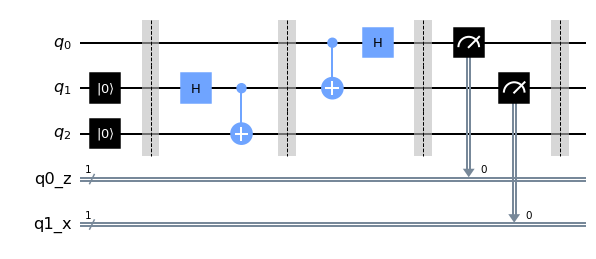

In [24]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

bitz = ClassicalRegister(1, 'q0_z')
bitx = ClassicalRegister(1, 'q1_x')
qr = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qr,bitz, bitx)

circuit.reset(1)
circuit.reset(2)

circuit.barrier()
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.barrier()

circuit.measure(0,bitz)
circuit.measure(1,bitx)

circuit.barrier()

circuit.draw()

El circuito de arriba es el de siempre, solo que ampliado con las medidas de $q_0$ y $q_1$. Cuando un qubit se mide, podemos pensar que "desaparece" y su resultado se almacena en bits normales. En este caso,  $q_0$ se almacena en  $q_0\_z$ y $q_0$ se almacena en  $q_1\_x$. Ya verás como esos nombres los he elegido con mucha intención. 

De momento, supongamos que realizamos la medida y, según las matemáticas, nos tiene que salir lo siguiente a la derecha de la última barrera. 


$$
\def\arraystretch{1.4}
   \begin{array}{c:c:c:c}
   q_0\_z & q_1\_x & &   \ket{q_2} \\ \hline
   {\color{red}0} & {\color{blue}0} & & \alpha \ket{\color{green}0} + \beta \ket{\color{green}1} \\
   \hdashline
   {\color{red}0} & {\color{blue}1} & &  \beta \ket{\color{green}0} + \alpha \ket{\color{green}1}  \\
   \hdashline
   {\color{red}1} & {\color{blue}0} & &   \alpha \ket{\color{green}0} - \beta \ket{\color{green}1} \\
   \hdashline
   {\color{red}1} & {\color{blue}1} & &  -\beta \ket{\color{green}0} + \alpha \ket{\color{green}1}  
\end{array}

$$



Como vemos, en nuestro circuito nos quedan unas cuantas variaciones $q_2$, dependiendo de la medida. Examinemos el resultado:
- si ha salido 00, $q_2$ es exactamente igual a lo que fue $q_0$ y eso es justamente lo que queríamos: los portadores de la información $\alpha$ y $\beta$ se han transferido a $q_2$ exactamente como estaban en $q_0$. **¡Hemos conseguido la teleportación!**
- si ha salido 01, $\alpha$ y $\beta$ también se han transferido a $q_2$ pero justo al revés. Un momento: seguro que recuerdas que había una transformación (una puerta cuántica) que siempre llevaba la contraria...
- si ha salido 10, también ha habido una transferencia pero la $\beta$ lleva un signo cambiado que afecta al $\ket1$. Espera otra vez: ¿no había también otra puerta cuántica que solo cambiaba de signo al $\ket1$?
- si ha salido 11, ¿desastre total...? No, solo han sucedido los dos contratiempos a la vez tenemos una inversión de coeficientes y un cambio de signo.
 
Si fuéramos excesivamente conformistas, pararíamos aquí y diríamos: para realizar una teleportación cuántica:
- partimos de nuestro qubit $q_0$ 
- lo juntamos con otros dos: $q_1$ y $q_2$
- añadimos puertas cuánticas como en el circuito de arriba
- medimos $q_0$ y $q_1$ 
- si tenemos suerte y sale 00 (que será un 25% de las veces) $q_2$ será lo que fue $q_1$. Objetivo logrado

Como digo, es un excesivo conformismo y, además innecesario, pues podríamos hacer cosas sencillas con $q_2$ y los resultados serían espectaculares.

$$
\def\arraystretch{1.6}
   \begin{array}{c:c:c:c:c:c}
   q_0\_z & q_1\_x & & \ket{q_2} & corrección & resultado \space en  \ket{q_2}  \\ \hline
   {\color{red}0} & {\color{blue}0} & & \alpha \ket{\color{green}0} + \beta \ket{\color{green}1} & & \alpha \ket{\color{green}0} + \beta \ket{\color{green}1} \\
   \hdashline
   {\color{red}0} & {\color{blue}1} & &  \beta \ket{\color{green}0} + \alpha \ket{\color{green}1} & \text{aplicar puerta X} & \alpha \ket{\color{green}0} + \beta \ket{\color{green}1} \\
   \hdashline
   {\color{red}1} & {\color{blue}0} & &   \alpha \ket{\color{green}0} - \beta \ket{\color{green}1} & \text{aplicar puerta Z} & \alpha \ket{\color{green}0} + \beta \ket{\color{green}1}\\
   \hdashline
   {\color{red}1} & {\color{blue}1} & &  -\beta \ket{\color{green}0} + \alpha \ket{\color{green}1}  & \text{aplicar puerta X y Z} & \alpha \ket{\color{green}0} + \beta \ket{\color{green}1}
\end{array}

$$


Ahora sí: sea como sea la medida, con esas acciones adicionales siempre conseguimos reproducir en $q_2$ el estado de $q_0$. **Lo hemos conseguido!** 

Por fin, es hora de mostrar el circuito completo que implementa la teleportación cuántica:






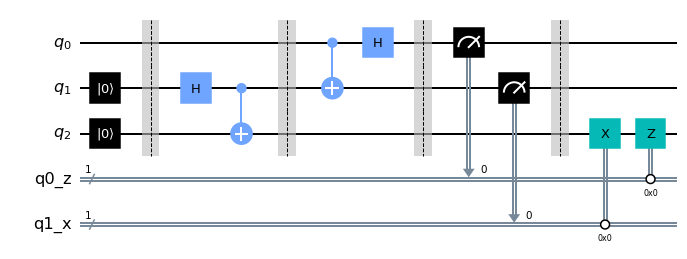

In [28]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

bitz = ClassicalRegister(1, 'q0_z')
bitx = ClassicalRegister(1, 'q1_x')
qr = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qr,bitz, bitx)

circuit.reset(1)
circuit.reset(2)

circuit.barrier()
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.barrier()

circuit.measure(0,bitz)
circuit.measure(1,bitx)

circuit.barrier()

circuit.x(2).c_if(bitx,0)
circuit.z(2).c_if(bitz,0)


circuit.draw()

Observa que las puertas $X$ y $Z$ son especiales, pues tienen otra entrada por abajo. Se llaman puertas controladas por un bit, no por un qubit como era la puerta $CNOT$. El control consiste en que esas puertas realizan la transformación solo si el bit de control vale 1. En caso contrario no hacen nada. Observa también que esas puertas están pensadas para realizar la corrección en el orden de la tabla anterior.


Gracias a este circuito, que implementa el algoritmo de teleportación cuántica: 
- en $q_2$ tenemos el estado de $q_0$
- $q_0$ ha perdido su información original... ahora se encuentra en $\ket0$ ó en $\ket1$, según haya salido la medición
- hemos necesitado un qubit adicional y dos bits normales para reproducir el estado de $q_0$

Permíteme señalar que esta transferencia de información no es instantánea. Esto no nos lo dicen las matemáticas, pero cuando fabricamos qubits con materiales que podemos tocar, ya no son esferas abstractas con flechitas que se mueven, sino elementos físicos que trabajan a una determinada velocidad y, hoy por hoy la velocidad máxima de cualquier cosa se corresponde a la velocidad de la luz (300.000 km/s) que para algunas cosas resulta incluso "lenta".

Finalmente, permíteme un consejo: si has conseguido llegar hasta aquí y te ha gustado lo que se puede hacer con la computación cuántica, no dejes pasar el momento y dedícate a ello. Te aseguro que esto que has visto no es nada en comparación con las cosas que se pueden hacer. Lo mejor que puedes hacer es apuntarte a un curso en la unversidad, comprarte un buen libro, mirar recursos online de [Qiskit](http://qiskit.org) o mirarte los videos tan alucinantes que publican los de [Qiskit](https://www.youtube.com/c/qiskit). Estos seguro que te enseñan las cosas con el rigor adecuado y la profundidad necesaria, no como yo.

Si, por el contrario, esto te parece pesado... no es por desanimarte,  pero te diría que las cosas que hay que aprender para dominar la computación cuántica son mucho más enrevesadas que la teleportación y no creas que te las van a explicar como yo lo he hecho. Así que a lo mejor la computación cuántica no es lo tuyo, al menos a este nivel de comprensión. Ya llegará el día en que la computación cuántica sea como conducir un coche... no se necesita saber de mecánica nada o casi nada. Hoy por hoy, desgraciadamente no es así pero la tecnología avanza rapidísimamente y seguro que en unos años este tutorial no sirve para nada por que ya la computación cuántica ha alcanzado un nivel muy superior.

Sea como fuere, espero que te haya servido de ayuda. Y si tienes algún comentario no dudes en enviármelo. Hasta pronto!

---

Capítulo anterior: [Circuitos](./l4.ipynb)

[Volver al índice](../README.md)